In [581]:
import pandas as pd
import re
import numpy as np
import statistics as stat
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.options.display.float_format = "{:.2f}".format

In [582]:
from scipy import stats

In [583]:
from scipy.stats.mstats import winsorize

In [584]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 

In [585]:
def  fill_most(group_col,col_name):
    
    for group in list(cars[group_col].unique()):
        mod = cars[cars[group_col]==group][col_name].mode()[0]
        grp_inx = list(cars[cars[group_col]==group][col_name].index)
        cars[col_name].iloc[grp_inx] = cars[col_name].iloc[grp_inx].fillna(mod)
      

In [586]:
def outlier(col):
    for i in cars.make_model.unique():
        for j in cars.Displacement.unique():
            for k in cars.hp.unique():
                    x = cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)]
                    cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)] = winsorize(x,(0.01,0.02))


In [587]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, np.percentile)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [588]:
cars = pd.read_csv("cleaned_cars.csv")

In [589]:
pd.set_option('display.max_rows', 999)

In [590]:
pd.set_option("display.max_columns",154)

In [591]:
cars.drop("Unnamed: 0",inplace=True,axis=1)

In [592]:
cars.drop(["Body Color Original","Emission Label"],inplace=True,axis=1)

In [593]:
cars

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,"Cloth, Black",Sedans,5,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Used,Black,3.90,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,"Cloth, Grey",Sedans,3,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",['\n7\n'],Used,Red,2.80,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,"Cloth, Black",Sedans,4,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Used,Black,3.80,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000,2016-08-01,66.00,1,0,2016,Metallic,"Cloth, Black",Sedans,3,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",['\n6\n'],Used,Brown,3.30,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200,2016-05-01,66.00,1,0,2016,Metallic,"Cloth, Black",Sedans,5,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,Used,Black,3.60,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,1653,2019-01-01,147.00,1,24,2019,Metallic,Cloth,Van,5,5.00,Automatic,1997.00,4.00,1758.00,front,diesel,5.30,139,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",['\n6\n'],New,Grey,0.90,11
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,9900,2019-01-01,165.00,1,25,2019,Metallic,Cloth,Van,5,5.00,Automatic,1798.00,4.00,1708.00,front,benzin,7.40,168,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",['\n7\n'],Used,Grey,0.90,11
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15,2019-03-01,146.00,1,27,2019,Metallic,"Full leather, Black",Van,5,7.00,Automatic,1997.00,4.00,1773.40,front,diesel,5.30,139,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",['\n6\n'],Pre-registered,White,0.80,9
15917,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10,2019

# NR OF DOORS

(<module 'matplotlib.pyplot' from 'C:\\Users\\mkdty\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
     threshold  outlier_count    pct
 0        1.00              1   0.00
 1        1.10              1   0.00
 2        1.20              1   0.00
 3        1.30              1   0.00
 4        1.40              1   0.00
 5        1.50              1   0.00
 6        1.60              1   0.00
 7        1.70              1   0.00
 8        1.80              1   0.00
 9        1.90              1   0.00
 10       2.00              1   0.00
 11       2.10              1   0.00
 12       2.20              1   0.00
 13       2.30              1   0.00
 14       2.40              1   0.00
 15       2.50              1   0.00
 16       2.60              1   0.00
 17       2.70              1   0.00
 18       2.80              1   0.00
 19       2.90              1   0.00
 20       3.00              1   0.00
 21       3.10              1   0.00
 22       3.20              1   0.00
 23

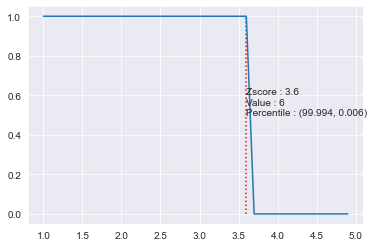

In [594]:
outlier_zscore(cars,"Nr. of Doors")

In [595]:
cars["Nr. of Doors"].value_counts(dropna=False)

5    11787
4     3079
3      832
2      219
7        1
1        1
Name: Nr. of Doors, dtype: int64

In [596]:
cars.groupby(["make_model","body_type"])["Nr. of Doors"].value_counts(dropna = False)

make_model      body_type      Nr. of Doors
Audi A1         Compact        5                683
                               4                207
                               3                 80
                               2                 69
                Coupe          2                  1
                               5                  1
                Other          5                  8
                               4                  5
                Sedans         5               1058
                               4                321
                               3                130
                               2                 29
                Station wagon  5                 17
                               4                  3
                               3                  1
                Van            5                  1
Audi A2         Off-Road       5                  1
Audi A3         Compact        5                165
                    

In [597]:
cars.groupby(["make_model","body_type"])["Nr. of Doors"].value_counts(dropna = False)

make_model      body_type      Nr. of Doors
Audi A1         Compact        5                683
                               4                207
                               3                 80
                               2                 69
                Coupe          2                  1
                               5                  1
                Other          5                  8
                               4                  5
                Sedans         5               1058
                               4                321
                               3                130
                               2                 29
                Station wagon  5                 17
                               4                  3
                               3                  1
                Van            5                  1
Audi A2         Off-Road       5                  1
Audi A3         Compact        5                165
                    

In [598]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(lambda x: 3.0 if x == 2.0 else x)

In [599]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(lambda x: 5.0 if x == 1.0 or x== 7.0  else x)

# gears

In [600]:
cars["Gears"].isnull().sum()

4712

In [601]:
cars["Gears"].unique()

array([nan, "['\\n7\\n']", "['\\n6\\n']", "['\\n5\\n']", "['\\n8\\n']",
       "['\\n1\\n']", "['\\n2\\n']", "['\\n50\\n']", "['\\n9\\n']",
       "['\\n3\\n']", "['\\n4\\n']"], dtype=object)

In [602]:
cars["Gear"]=cars["Gears"].apply(lambda x : "".join([i for i in x if i.isnumeric()]) if x is not np.nan else x)

In [603]:
cars["Gear"].isnull().sum()

4712

In [604]:
cars["Gear"] = cars["Gear"].astype(float)

In [605]:
cars["Gear"].value_counts(dropna=False) 

6.00     5822
nan      4712
5.00     3239
7.00     1908
8.00      224
9.00        6
4.00        2
3.00        2
1.00        2
50.00       1
2.00        1
Name: Gear, dtype: int64

In [606]:
cars[cars["Gear"]==9.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month,Gear
15812,Renault Espace,1.8 TCe Initiale Paris 7p NWPR:,Van,54982,VAT deductible,11,2019-07-01,165.00,1,31,2019,Metallic,Part leather,Van,5.00,7.00,Automatic,1798.00,4.00,1647.00,front,benzin,7.60,152,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,White,0.40,5,9.00
15814,Renault Espace,1.8 TCe Initiale Paris 7p NWPR:,Van,54982,VAT deductible,11,2019-07-01,165.00,1,31,2019,Metallic,Part leather,Van,5.00,7.00,Automatic,1798.00,4.00,1647.00,front,benzin,7.60,152,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,White,0.40,5,9.00
15824,Renault Espace,"1.8 TCe Initiale Paris 5p NWPR: € 61.685,-",Van,52711,VAT deductible,11,2019-07-01,165.00,1,31,2019,Metallic,Part leather,Van,5.00,7.00,Automatic,1798.00,4.00,1608.00,front,benzin,7.40,168,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,Grey,0.40,5,9.00
15827,Renault Espace,"1.8 TCe Initiale Paris 5p NWPR: € 61.685,-",Van,52711,VAT deductible,11,2019-07-01,165.00,1,31,2019,Metallic,Part leather,Van,5.00,7.00,Automatic,1798.00,4.00,1608.00,front,benzin,7.40,174,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,Grey,0.40,5,9.00
15869,Renault Espace,2.0 dCi 200 Intens 5p.,Van,49100,VAT deductible,11,2019-09-01,146.00,1,33,2019,Metallic,Part leather,Van,5.00,5.00,Automatic,1997.00,4.00,1740.00,front,diesel,5.30,139,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,White,0.20,3,9.00
15876,Renault Espace,1.8 TCe Intens 5p.,Van,48765,VAT deductible,11,2019-09-01,165.00,1,33,2019,Metallic,Part leather,Van,5.00,5.00,Automatic,1798.00,4.00,1608.00,front,benzin,7.40,152,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n9\n'],New,White,0.20,3,9.00


In [607]:
indx_list = list(cars[cars["Gear"]== 9.0].index)
cars.Gear.iloc[indx_list] = 7.0

In [608]:
cars.Gear.iloc[indx_list]

15812   7.00
15814   7.00
15824   7.00
15827   7.00
15869   7.00
15876   7.00
Name: Gear, dtype: float64

In [609]:
cars[cars["Gear"]==4.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month,Gear
15822,Renault Espace,1.8 TCe Intens 7p. [Pack Lumière + Easy Life P...,Van,50950,VAT deductible,11,2019-03-01,165.00,1,27,2019,Metallic,Cloth,Van,5.00,7.00,Automatic,1798.00,4.00,1647.00,front,benzin,7.60,168,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n4\n'],New,Grey,0.80,9,4.00
15823,Renault Espace,1.8 TCe Intens 7p. [Panoramadak + Camera],Van,50950,VAT deductible,11,2019-03-01,165.00,1,27,2019,Metallic,Cloth,Van,5.00,7.00,Automatic,1798.00,4.00,1647.00,front,benzin,7.60,168,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n4\n'],New,Grey,0.80,9,4.00


In [610]:

cars.Gear.iloc[15822] =7.0
cars.Gear.iloc[15823] = 7.0

In [611]:
cars[cars["Gear"]==2.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month,Gear
9812,Opel Corsa,1.2i ENJOY 5D*NAVI*ALU VELGEN*AIRCO,Sedans,9880,VAT deductible,19247,2018-05-01,51.00,1,12,2018,Metallic,"Cloth, Black",Sedans,5.00,5.00,Manual,1229.00,4.00,1149.19,front,benzin,nan,129,Euro 6,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",['\n2\n'],Used,Grey,1.60,19,2.00


In [612]:
cars.Gear.iloc[9812] = 5.0

In [613]:
cars[cars["Gear"]==1.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month,Gear
8921,Opel Corsa,1.4 benzine - Enjoy - Automaat,Compact,11000,VAT deductible,24000,2018-04-01,66.00,1,24,2018,Metallic,"Cloth, Black",Compact,5.00,5.00,Semi-automatic,1398.00,4.00,1163.00,front,benzin,4.80,112,Euro 6,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",['\n1\n'],Used,Blue,1.70,20,1.00
14375,Renault Clio,Renault R.S. 200 EDC,Compact,23990,NaN,10,2018-10-01,147.00,1,48,2018,Metallic,"Part leather, Black",Compact,4.00,5.00,Automatic,1618.00,4.00,1288.00,front,benzin,nan,135,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",['\n1\n'],Demonstration,White,1.20,14,1.00


In [614]:
cars.Gear.iloc[8921] = 5
cars.Gear.iloc[14375] = 6

In [615]:
cars[cars["Gear"]==3.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Types,body_color,age_as_year,age_as_month,Gear
15817,Renault Espace,2.0 dCi In.Paris 7p.,Van,54204,VAT deductible,11,2019-05-01,146.00,1,29,2019,Metallic,Part leather,Van,5.00,5.00,Automatic,1997.00,4.00,1779.00,front,diesel,5.40,139,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n3\n'],New,White,0.60,7,3.00
15845,Renault Espace,2.0 dCi 160 Intens 5p.,Van,46660,VAT deductible,11,2019-09-01,118.00,1,33,2019,Metallic,Part leather,Van,5.00,7.00,Automatic,1997.00,4.00,1733.00,front,diesel,5.10,148,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",['\n3\n'],New,White,0.20,3,3.00


In [616]:
cars.Gear.iloc[15817] = 7
cars.Gear.iloc[15845] = 7

In [617]:
cars["Gear"]=cars["Gear"].apply(lambda x: 5.0 if x== 50.0 else x)

In [618]:
cars["Gear"].value_counts(dropna=False) 

6.00    5823
nan     4712
5.00    3242
7.00    1918
8.00     224
Name: Gear, dtype: int64

In [619]:
cars["Gear"].isnull().sum()

4712

In [620]:
cars["Gear"].mode()

0   6.00
dtype: float64

In [621]:
cars["make_model"]

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object

In [622]:
cars["Gear"]=cars["Gear"].fillna(cars.groupby("make_model")["Gear"].transform(stat.mode))

In [623]:
cars["Gear"].isnull().sum()

1

In [624]:
cars["Gear"].fillna(5.0,inplace=True)

In [625]:
cars.drop("Gears",axis=1,inplace=True)

# body type

In [626]:
cars["body_type"].isnull().sum()

60

In [627]:
fill_most("make_model","body_type")

In [628]:
#cars.groupby("make_model")["body_type"].ffill().isnull().sum()

In [629]:
#cars["body_type"]=cars.groupby("make_model")["body_type"].ffill()

In [630]:
cars["body_type"].isnull().sum()

0

# emission class

In [631]:
# we think emission class affect the price less or not

In [632]:
cars["Emission Class"]

0        Euro 6
1        Euro 6
2        Euro 6
3        Euro 6
4        Euro 6
          ...  
15914       NaN
15915       NaN
15916    Euro 6
15917    Euro 6
15918    Euro 6
Name: Emission Class, Length: 15919, dtype: object

In [633]:
cars["Emission Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission Class, dtype: int64

In [634]:
show_nans(cars,10)

vat              28.35
Consumption      11.97
Emission Class   22.79
dtype: float64

In [635]:
cars.drop("Emission Class",axis=1,inplace=True)

# Comb

In [636]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,"Cloth, Black",Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,"Cloth, Grey",Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,"Cloth, Black",Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000,2016-08-01,66.00,1,0,2016,Metallic,"Cloth, Black",Sedans,3.00,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Used,Brown,3.30,40,6.00
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200,2016-05-01,66.00,1,0,2016,Metallic,"Cloth, Black",Sedans,5.00,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Used,Black,3.60,43,5.00


In [637]:
cars["Consumption"]

0       3.80
1       5.60
2       3.80
3       3.80
4       4.10
        ... 
15914   5.30
15915   7.40
15916   5.30
15917   5.30
15918   6.80
Name: Consumption, Length: 15919, dtype: float64

In [638]:
cars["Consumption"].sort_values().head(15)

8217    0.00
10566   0.00
14902   1.00
13678   1.20
3617    1.60
3612    1.60
3615    1.60
6906    3.00
8762    3.00
6403    3.00
6404    3.00
8805    3.00
8822    3.00
6778    3.00
13257   3.00
Name: Consumption, dtype: float64

In [639]:
#No car has such a low fuel consumption
cons_bool=cars["Consumption"].isin([0.0,1.0,1.2,1.6])

In [640]:
cars.loc[cons_bool,"Consumption"] = np.nan

In [641]:
cars.loc[cons_bool,"Consumption"]

3612    nan
3615    nan
3617    nan
8217    nan
10566   nan
13678   nan
14902   nan
Name: Consumption, dtype: float64

In [642]:
cars.groupby("make_model")["Consumption"].transform("mean")

0       4.47
1       4.47
2       4.47
3       4.47
4       4.47
        ... 
15914   5.45
15915   5.45
15916   5.45
15917   5.45
15918   5.45
Name: Consumption, Length: 15919, dtype: float64

In [643]:
cars["Consumption"]=cars["Consumption"].fillna(cars.groupby("make_model")["Consumption"].transform("mean"))

In [644]:
cars["Consumption"][cars["Consumption"].isnull()]

Series([], Name: Consumption, dtype: float64)

In [645]:
indx = cars["Consumption"].sort_values().tail(53).index


In [646]:
cars["Consumption"]

0       3.80
1       5.60
2       3.80
3       3.80
4       4.10
        ... 
15914   5.30
15915   7.40
15916   5.30
15917   5.30
15918   6.80
Name: Consumption, Length: 15919, dtype: float64

In [647]:
cars["Consumption"].loc[list(indx)] = cars["Consumption"].loc[list(indx)]/10

In [648]:
cars["Consumption"].loc[list(indx)]

14921   1.00
14920   1.00
14911   1.00
14912   1.00
14919   1.00
14918   1.00
14917   1.00
14916   1.00
14915   1.00
14922   1.00
14925   1.00
14895   1.00
14896   1.00
14897   1.00
14898   1.00
14899   1.00
14907   1.00
2801    1.00
14894   1.00
14900   1.00
14902   1.00
14903   1.00
14904   1.00
14905   1.00
14927   1.00
14926   1.00
14901   1.00
14924   1.00
14914   1.00
14910   1.00
14909   1.00
14913   1.00
13894   1.00
14906   1.00
14908   1.00
14923   1.00
10513   1.10
535     1.38
14131   3.20
14530   3.30
4556    3.80
4558    3.80
4089    4.00
4102    4.00
500     4.30
15067   4.60
14584   5.00
2210    5.10
2196    5.10
2194    5.10
2237    5.10
13179   5.40
11954   5.50
Name: Consumption, dtype: float64

In [649]:
cons_bool1=cars["Consumption"].isin([0.0,1.0,1.10,1.38])

In [650]:
cars.loc[cons_bool1,"Consumption"] = np.nan

In [651]:
cars.groupby("make_model")["Consumption"].mean()

make_model
Audi A1          4.38
Audi A2          4.90
Audi A3          4.34
Opel Astra       4.71
Opel Corsa       5.51
Opel Insignia    5.39
Renault Clio     4.73
Renault Duster    nan
Renault Espace   5.41
Name: Consumption, dtype: float64

In [652]:
cars["Consumption"].isnull().sum()

37

In [653]:
cars["Consumption"].fillna(cars["Consumption"].mean(),inplace=True)

# VAT

In [654]:
cars["vat"] =cars.groupby("make_model")["vat"].ffill()

In [655]:
cars["vat"].isnull().sum()

4

In [656]:
cars["vat"].fillna(method="ffill",inplace=True)

# concatnate categorical columns

# extra

In [657]:
extra = cars["Extra"].str.get_dummies(",")
extra

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [658]:
safety = cars["Safety & Security"].str.get_dummies(",")
safety

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [659]:
media= cars["Entertainment & Media"].str.get_dummies(",")

In [660]:
comfort = cars["Comfort & Convenience"].str.get_dummies(",")
comfort

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [661]:
body_type =cars["body_type"].str.get_dummies()
body_type

,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,1
15915,0,0,0,0,0,0,0,0,1
15916,0,0,0,0,0,0,0,0,1
15917,0,0,0,0,0,0,0,0,1


In [662]:
cars["body_type"].value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [663]:
vat = cars["vat"].str.get_dummies()
vat

,Price negotiable,VAT deductible
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
15914,0,1
15915,0,1
15916,0,1
15917,0,1


In [664]:
paint = cars["Paint Type"].str.get_dummies()
paint

,Metallic,Perl effect,Uni/basic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
15914,1,0,0
15915,1,0,0
15916,1,0,0
15917,1,0,0


In [665]:
def uphols(x):
    if "Cloth" in x:
        return "Cloth"
    elif "Part leather" in x:
        return "Part leather"
    elif "Full leather" in x:
        return "Full leather"
    elif "Velour" in x:
        return "Velour"
    elif "alcantara" in x:
        return "alcantara"

In [666]:
cars["Upholstery"] = cars["Upholstery"].apply(uphols)

In [667]:
uphols = cars["Upholstery"].str.get_dummies()
uphols

,Cloth,Full leather,Part leather,Velour,alcantara
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
15914,1,0,0,0,0
15915,1,0,0,0,0
15916,0,1,0,0,0
15917,0,0,1,0,0


In [668]:
gear_type = cars["Gearing Type"].str.get_dummies()
gear_type

,Automatic,Manual,Semi-automatic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
15914,1,0,0
15915,1,0,0
15916,1,0,0
15917,1,0,0


In [669]:
Fuel = cars["Fuel"].str.get_dummies()


In [670]:
types = cars["Types"].str.get_dummies()

In [671]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,VAT deductible,73000,2016-08-01,66.00,1,0,2016,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Used,Brown,3.30,40,6.00
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,VAT deductible,16200,2016-05-01,66.00,1,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Used,Black,3.60,43,5.00


In [672]:
cars_new = pd.concat([cars,extra,safety,media,comfort,body_type,vat,uphols,gear_type,Fuel,types],axis=1 )

In [673]:
cars_new.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [674]:
cars.drop("short_description",inplace=True,axis=1)

# handle with outliers

# Weight

In [675]:
cars.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [676]:

def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k),col]
            if len(x) == 0:
                pass
            else:    
                y = pd.Series(winsorize(x,(0.11,0.05)))
                y.index = x.index
            
                cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k),col] = y

In [677]:
cars_new.loc[(cars_new.make_model == "Audi A1")&(cars_new.hp == 110.0),"Weight"]

184    1221.67
200    1221.67
249    1230.00
408    1205.00
912    1221.67
942    1221.67
946    1180.00
960    1240.00
1006   1230.00
1029   1215.00
1038   1180.00
1565   1230.00
1585   1221.67
1612   1220.00
1620   1240.00
1635   1240.00
1641   1180.00
1656   1221.67
1692   1221.67
1693   1221.67
1890   1180.00
1959   1240.00
2000   1248.85
2015   1248.85
2063   1240.00
2138   1180.00
2175   1240.00
2353   1240.00
2360   1655.00
2383   1248.85
Name: Weight, dtype: float64

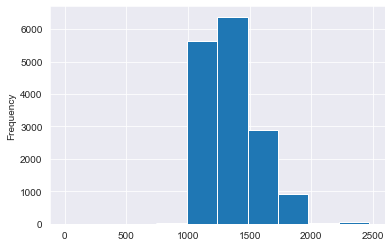

In [678]:
cars["Weight"].plot.hist()

In [679]:
cars_new["Weight"].describe()

count   15919.00
mean     1353.05
std       206.46
min         1.00
25%      1180.37
50%      1315.69
75%      1470.22
max      2471.00
Name: Weight, dtype: float64

In [680]:
cars_new["Weight"].sort_values().tail(25)

15359   2353.00
15360   2353.00
15230   2353.00
14987   2353.00
15241   2353.00
15219   2353.00
15217   2353.00
14946   2353.00
14939   2353.00
14930   2353.00
11750   2355.00
10881   2400.00
11077   2400.00
15133   2410.00
15170   2410.00
15142   2410.00
15143   2410.00
15136   2410.00
10646   2450.00
10638   2450.00
15678   2471.00
15280   2471.00
14975   2471.00
15185   2471.00
15231   2471.00
Name: Weight, dtype: float64

In [681]:
cars.iloc[cars_new["Weight"].sort_values().tail(25).index]

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
15359,Renault Espace,Transporter,20500,VAT deductible,16995,2016-05-01,96.00,1,12,2016,Metallic,None,Transporter,5.00,5.00,Manual,1598.00,4.00,2353.00,front,diesel,4.50,116,"Air conditioning,Cruise control,Multi-function...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Black,3.60,43,6.00
15360,Renault Espace,Transporter,20500,VAT deductible,6119,2016-05-01,96.00,1,12,2016,Metallic,None,Transporter,5.00,5.00,Manual,1598.00,4.00,2353.00,front,diesel,4.50,116,"Air conditioning,Cruise control,Multi-function...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Grey,3.60,43,6.00
15230,Renault Espace,Transporter,19450,VAT deductible,82000,2017-01-01,118.00,1,12,2017,Metallic,Full leather,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Beige,2.90,35,6.00
14987,Renault Espace,Transporter,27000,VAT deductible,26000,2017-04-01,118.00,1,12,2017,Metallic,Full leather,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Cruise control,Navigation system,Park Distance...",On-board computer,Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",Used,Grey,2.70,32,6.00
15241,Renault Espace,Transporter,20450,VAT deductible,86000,2016-01-01,118.00,1,12,2016,Metallic,None,Transporter,5.00,7.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Brown,3.90,47,6.00
15219,Renault Espace,Transporter,19950,VAT deductible,98000,2016-01-01,118.00,1,12,2016,Metallic,Full leather,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Beige,3.90,47,6.00
15217,Renault Espace,Transporter,19950,VAT deductible,66000,2016-01-01,118.00,1,12,2016,Metallic,None,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,6.00
14946,Renault Espace,Transporter,24900,VAT deductible,21790,2016-05-01,118.00,2,12,2016,Metallic,Cloth,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Grey,3.60,43,6.00
14939,Renault Espace,Transporter,24900,VAT deductible,19377,2016-05-01,118.00,1,12,2016,Metallic,Part leather,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Black,3.60,43,6.00
14930,Renault Espace,Transporter,17950,VAT deductible,99950,2016-01-01,118.00,1,12,2016,Metallic,Full leather,Transporter,5.00,5.00,Automatic,1598.00,4.00,2353.00,front,diesel,4.70,120,"Air conditioning,Cruise control,Electrically a...","On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Used,Brown,3.90,47,6.00


In [682]:
outlier("Weight")

In [683]:
cars_new["Weight"].sort_values().tail()

15294   2353.00
15360   2353.00
15357   2353.00
15330   2353.00
15359   2353.00
Name: Weight, dtype: float64

In [684]:
cars["Weight"].tail()

15914   1758.00
15915   1708.00
15916   1773.40
15917   1758.00
15918   1685.00
Name: Weight, dtype: float64

In [685]:
cars_new["Weight"].describe()

count   15919.00
mean     1350.57
std       193.75
min       840.00
25%      1186.09
50%      1315.69
75%      1470.22
max      2353.00
Name: Weight, dtype: float64

In [686]:
cars_new["Weight"].isnull().sum()

0

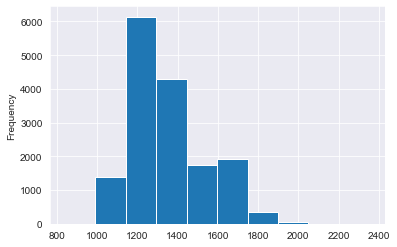

In [687]:
cars_new["Weight"].plot.hist()

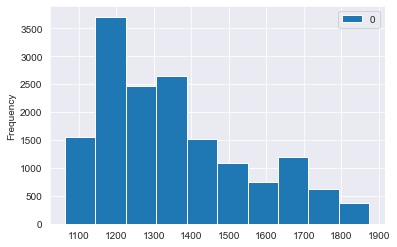

In [688]:
pd.DataFrame(winsorize(cars["Weight"],(0.01,0.01))).plot.hist()

# horsepower

In [689]:
def outlier(col):
    for i in cars_new.make_model.unique():
        
            x = cars_new.loc[(cars_new.make_model == i),col]
            if len(x) == 0:
                pass
            else:    
                y = pd.Series(winsorize(x,(0.005,0.002)))
                y.index = x.index
            
                cars_new.loc[(cars_new.make_model == i),col] = y

In [690]:
cars[(cars["hp"] >50)&(cars["make_model"]=="Audi A1")].head(5)

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00
3,Audi A1,Sedans,14500,VAT deductible,73000,2016-08-01,66.00,1,0,2016,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Used,Brown,3.30,40,6.00
4,Audi A1,Sedans,16790,VAT deductible,16200,2016-05-01,66.00,1,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Used,Black,3.60,43,5.00


In [691]:
q1 = cars_new["hp"].quantile(0.25)
q3 =  cars_new["hp"].quantile(0.75)
ıqr = q3-q1
ıqr

35.0

In [692]:
lower_lim=q1-1.5 *ıqr
upper_lim=q3+1.5 *ıqr

In [693]:
outlier_low =(cars_new["hp"] < lower_lim)
outlier_up =(cars_new["hp"]> upper_lim)

In [694]:
before = cars_new["hp"].describe()
before

count   15919.00
mean       88.43
std        26.85
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp, dtype: float64

In [695]:
cars_new["hp"].sort_values().head(25)

10468    1.00
10579    1.00
7016     1.00
10580    1.00
10610    1.00
6946     1.00
9292     1.00
6034     1.00
9299     1.00
9290     1.00
9288     1.00
7018     1.00
9287     1.00
9285     1.00
6005     1.00
7019     1.00
15155    1.00
15156    1.00
9289     1.00
7014     1.00
13885    4.00
3913     9.00
8857    40.00
13759   40.00
8408    44.00
Name: hp, dtype: float64

In [696]:
cars_new["hp"].sort_values().tail(25)

12417   191.00
11117   195.00
3597    228.00
3594    228.00
10513   239.00
3608    270.00
3609    270.00
3590    294.00
3603    294.00
3604    294.00
3605    294.00
3606    294.00
3601    294.00
3610    294.00
3587    294.00
3600    294.00
3598    294.00
3596    294.00
3595    294.00
3648    294.00
3593    294.00
3592    294.00
3649    294.00
3599    294.00
3602    294.00
Name: hp, dtype: float64

In [697]:
outlier("hp")# after clean outliers

In [698]:
cars_new["hp"].sort_values().tail(25)

12417   191.00
10513   191.00
12530   191.00
3597    228.00
3594    228.00
3609    270.00
3608    270.00
3649    294.00
3604    294.00
3605    294.00
3606    294.00
3602    294.00
3610    294.00
3601    294.00
3648    294.00
3600    294.00
3598    294.00
3596    294.00
3595    294.00
3593    294.00
3592    294.00
3590    294.00
3587    294.00
3599    294.00
3603    294.00
Name: hp, dtype: float64

In [699]:
cars_new["hp"].describe()

count   15919.00
mean       88.52
std        26.65
min        51.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp, dtype: float64

In [700]:
cars.loc[cars_new["hp"].sort_values().tail(25).index]

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
12417,Opel Insignia,Sedans,37875,VAT deductible,27120,2019-05-01,191.00,1,12,2019,Metallic,Full leather,Sedans,5.00,5.00,Automatic,1998.00,4.00,1649.00,front,benzin,5.41,153,"Air conditioning,Automatic climate control,Cru...","Bluetooth,MP3,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Driver-side airbag,Elect...",Used,White,0.60,7,8.00
10513,Opel Insignia,Station wagon,17990,VAT deductible,145000,2016-04-01,239.00,1,0,2016,Metallic,Full leather,Station wagon,4.00,5.00,Automatic,1662.64,4.00,1692.50,4WD,benzin,4.85,253,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",Used,Red,3.70,44,6.00
12530,Opel Insignia,Station wagon,35380,VAT deductible,2445,2019-02-01,191.00,1,26,2019,Metallic,None,Station wagon,4.00,5.00,Automatic,1662.64,4.00,1441.00,4WD,benzin,8.60,197,"Air conditioning,Automatic climate control,Cru...","Bluetooth,MP3,On-board computer,Radio","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",New,White,0.80,10,6.00
3597,Audi A3,Convertible,56100,VAT deductible,8364,2018-04-01,228.00,1,16,2018,Metallic,Part leather,Convertible,3.00,5.00,Semi-automatic,1984.00,4.00,1635.00,4WD,benzin,7.10,153,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Alarm system,Central door lock,Driver-side...",Used,Blue,1.70,20,7.00
3594,Audi A3,Sedans,58990,VAT deductible,7500,2018-02-01,228.00,1,14,2018,Metallic,Full leather,Sedans,5.00,5.00,Semi-automatic,1984.00,4.00,1635.00,4WD,benzin,6.50,149,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Adaptive headlight...",Used,Blue,1.80,22,7.00
3609,Audi A3,Sedans,41000,Price negotiable,30000,2016-05-01,270.00,1,0,2016,Metallic,Part leather,Sedans,5.00,5.00,Semi-automatic,2480.00,5.00,1595.00,front,benzin,8.10,189,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,On-board computer","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Alarm system,Centr...",Used,Blue,3.60,43,7.00
3608,Audi A3,Sedans,42500,Price negotiable,37333,2016-01-01,270.00,1,0,2016,Metallic,Part leather,Sedans,5.00,5.00,Semi-automatic,2480.00,5.00,1595.00,front,benzin,8.10,189,"Air conditioning,Seat ventilation,Split rear s...",Bluetooth,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...",Used,Grey,3.90,47,7.00
3649,Audi A3,Compact,67600,VAT deductible,37747,2017-10-01,294.00,1,10,2017,Metallic,Full leather,Compact,5.00,5.00,Semi-automatic,2480.00,5.00,1485.00,4WD,benzin,8.30,189,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",Used,White,2.20,26,7.00
3604,Audi A3,Sedans,50000,VAT deductible,25000,2018-02-01,294.00,1,14,2018,Metallic,Full leather,Sedans,5.00,5.00,Semi-automatic,2480.00,5.00,1585.00,front,benzin,8.30,189,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Alarm system,Centr...",Used,Grey,1.80,22,7.00
3605,Audi A3,Sedans,51999,VAT deductible,33000,2017-10-01,294.00,1,10,2017,Metallic,Full leather,Sedans,5.00,5.00,Semi-automatic,2480.00,5.00,1585.00,4WD,benzin,8.30,189,"Air

In [701]:
cars_new["hp"].describe()

count   15919.00
mean       88.52
std        26.65
min        51.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp, dtype: float64

In [702]:
cars["hp"].describe()

count   15919.00
mean       88.43
std        26.85
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp, dtype: float64

In [703]:
cars_new[(cars_new["hp"] > 51)&(cars_new["hp"] < 100)]["hp"].sort_values().head(5)

9182   52.00
8941   52.00
8937   52.00
8728   52.00
8727   52.00
Name: hp, dtype: float64

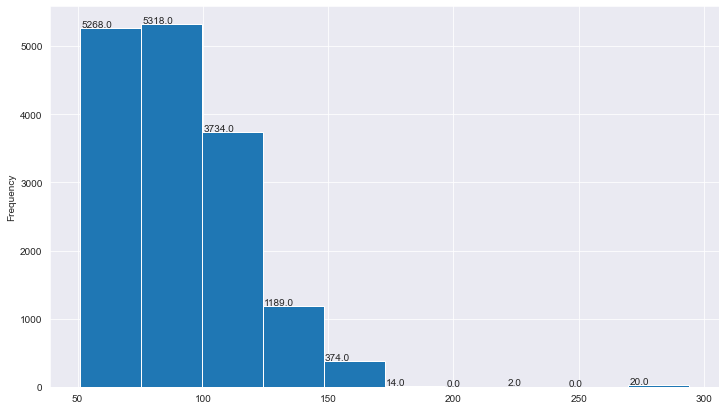

In [704]:
sns.set_style("darkgrid")
g = cars_new["hp"].plot.hist(bins=10,figsize=(12,7))
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.5, p.get_height()+17.5));
    

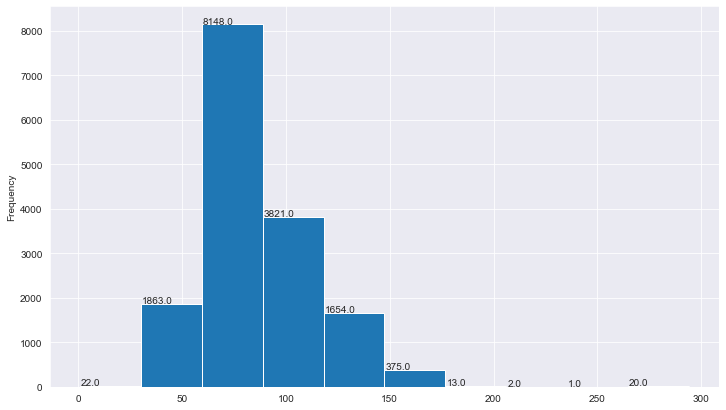

In [705]:
sns.set_style("darkgrid")
g = cars["hp"].plot.hist(bins=10,figsize=(12,7))
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.5, p.get_height()+17.5));

In [706]:
cars_new["hp"][outlier_up]

3353    162.00
3587    294.00
3590    294.00
3592    294.00
3593    294.00
3594    228.00
3595    294.00
3596    294.00
3597    228.00
3598    294.00
3599    294.00
3600    294.00
3601    294.00
3602    294.00
3603    294.00
3604    294.00
3605    294.00
3606    294.00
3608    270.00
3609    270.00
3610    294.00
3648    294.00
3649    294.00
10507   184.00
10513   191.00
10515   184.00
10548   184.00
10571   184.00
10789   191.00
11117   191.00
11432   184.00
12411   154.00
12412   154.00
12414   154.00
12417   191.00
12421   154.00
12422   191.00
12426   154.00
12437   154.00
12464   154.00
12469   154.00
12470   154.00
12472   154.00
12490   154.00
12491   154.00
12492   154.00
12494   154.00
12503   154.00
12509   154.00
12518   154.00
12519   154.00
12520   154.00
12521   154.00
12523   154.00
12526   154.00
12527   154.00
12529   191.00
12530   191.00
12531   155.00
12532   155.00
12534   154.00
12536   155.00
12541   155.00
12542   154.00
12545   155.00
12552   154.00
12553   19

In [707]:
after = cars_new["hp"].describe()
after

count   15919.00
mean       88.52
std        26.65
min        51.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp, dtype: float64

In [708]:
cars_new[outlier_low].head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
3913,Audi A3,Audi A3 Sportback 2.0TDI 150 Sline Stronic 7,Sedans,20440,VAT deductible,24000,2017-08-01,81.00,1,8,2017,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1510.70,4.00,1845.00,front,diesel,4.38,119,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",Used,Black,2.30,28,6.00,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6005,Opel Astra,"SW OPEL SW 1.0 EASYTRONIC 105 CV Elective, 77 ...",Station wagon,11600,VAT deductible,73860,2017-02-01,66.00,1,2,2017,Metallic,None,Station wagon,5.00,5.00,Automatic,998.00,4.00,1265.92,front,benzin,4.71,167,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",Used,Black,2.80,34,6.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
6034,Opel Astra,"SW OPEL SW 1.0 EASYTRONIC 105 CV Elective, 77 ...",Station wagon,11600,VAT deductible,76010,2017-02-01,66.00,1,2,2017,Metallic,Cloth,Station wagon,5.00,5.00,Automatic,998.00,4.00,1364.00,front,benzin,4.71,102,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","Alarm system,Central door lock,Driver-side air...",Used,Silver,2.80,34,6.00,1

# cars price

In [710]:
q1 = cars_new["price"].quantile(0.25)
q3 =  cars_new["price"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["price"] < lower_lim)
outlier_up =(cars_new["price"]> upper_lim)

In [711]:
q1 = cars_new["price"].quantile(0.25)
q1

12850.0

In [712]:
ıqr

9050.0

In [713]:
lower_lim

3800.0

In [714]:
cars.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [715]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.11)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [716]:
x = cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] 
x.describe()

count     229.00
mean    42541.10
std      6391.05
min     35500.00
25%     37870.00
50%     39990.00
75%     46666.00
max     68320.00
Name: price, dtype: float64

In [717]:
cars.price.nsmallest(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [718]:
cars_new.drop(index=[8594,8828,6066,8829],axis=0,inplace=True)
# we drop unreal values

In [719]:
cars_new.price.describe()

count   15915.00
mean    18024.38
std      7381.68
min      4950.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [720]:
#bb.index= x.index
#bb

In [721]:
#cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] =bb

In [722]:
#cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] 

# Nr of Door

In [723]:
cars_new["Nr. of Doors"].unique()

array([5., 3., 4.])

In [724]:
cars_new["Nr. of Doors"].isnull().sum()

0

In [725]:
cars_new.groupby(["body_type","make_model"])["Nr. of Doors"].value_counts()

body_type      make_model      Nr. of Doors
Compact        Audi A1         5.00             683
                               4.00             207
                               3.00             149
               Audi A3         5.00             165
                               3.00              11
                               4.00               6
               Opel Astra      5.00             180
                               4.00               5
               Opel Corsa      5.00             537
                               3.00             426
                               4.00             268
               Opel Insignia   5.00              26
                               4.00               1
               Renault Clio    5.00             314
                               4.00             170
               Renault Espace  5.00               5
                               4.00               1
Convertible    Audi A3         3.00               7
                    

# Nr. of Seats

In [726]:
cars_new["Nr. of Seats"].value_counts(dropna=False)

5.00    14163
4.00     1200
7.00      416
2.00      133
6.00        2
3.00        1
Name: Nr. of Seats, dtype: int64

In [727]:
cars_new[cars_new["Nr. of Seats"]==6.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
582,Audi A1,1.0 Tfsi 95cv Design,Compact,13500,VAT deductible,100000,2017-01-01,70.00,1,12,2017,Metallic,Cloth,Compact,5.00,6.00,Manual,1000.00,4.00,1500.00,front,benzin,4.47,118,Air conditioning,On-board computer,Alloy wheels,ABS,Used,White,2.90,35,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
15890,Renault Espace,BLUE dCi 200 EDC LIMITED,Station wagon,42490,VAT deductible,1653,2019-06-01,147.00,1,30,2019,Metallic,Cloth,Station wagon,5.00,6.00,Automatic,1997.00,4.00,1840.00,front,diesel,5.70,168,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",New,Black,0.50,6,6.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [728]:
cars_new["Nr. of Seats"].loc[[582,15890]]= 5.0

In [729]:
cars_new[cars_new["Nr. of Seats"]==3.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
1636,Audi A1,1.8 TFSI*DAB*NaviPlus*Led.*Sportsi.*Xen*PDC*,Compact,23090,VAT deductible,9821,2018-06-01,141.00,1,18,2018,Metallic,Part leather,Compact,3.00,3.00,Automatic,1798.00,4.00,1323.75,front,benzin,5.80,134,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",Used,Black,1.50,18,7.00,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [730]:
cars_new.loc[1636] =5.0

In [731]:
cars_new["Nr. of Seats"].value_counts(dropna=False)

5.00    14166
4.00     1200
7.00      416
2.00      133
Name: Nr. of Seats, dtype: int64

In [732]:
cars_new.loc[cars_new.make_model=="Renault Espace","body_type"]=cars_new.loc[cars_new.make_model=="Renault Espace","body_type"].apply(lambda x: "Van" 
if x == "Sedans" or x == "Compact" or x=="Off-Road" or x== "Other" or x=="Coupe"else x ) 

In [733]:
cars_new["Nr. of Seats"].unique()

array([5., 4., 2., 7.])

In [734]:
cars_new.groupby(["body_type","make_model"])["Nr. of Seats"].value_counts()

body_type      make_model      Nr. of Seats
5.0            5.0             5.00               1
Compact        Audi A1         5.00             573
                               4.00             465
               Audi A3         5.00             182
               Opel Astra      5.00             185
               Opel Corsa      5.00            1226
                               4.00               5
               Opel Insignia   5.00              27
               Renault Clio    5.00             475
                               2.00               9
Convertible    Audi A3         4.00               5
                               5.00               3
Coupe          Audi A1         4.00               1
                               5.00               1
               Audi A3         5.00               4
               Opel Astra      4.00               1
                               5.00               1
               Opel Corsa      5.00              12
                    

# ----------------------------------------------------------------------------

In [735]:
cars.head()

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00
3,Audi A1,Sedans,14500,VAT deductible,73000,2016-08-01,66.00,1,0,2016,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Used,Brown,3.30,40,6.00
4,Audi A1,Sedans,16790,VAT deductible,16200,2016-05-01,66.00,1,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Used,Black,3.60,43,5.00


# Displacement

In [736]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.19)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [737]:
cars.Displacement.head()

0   1422.00
1   1798.00
2   1598.00
3   1422.00
4   1422.00
Name: Displacement, dtype: float64

In [738]:
cars.Displacement.describe()

count   15919.00
mean     1424.49
std       329.78
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement, dtype: float64

In [739]:
q1 = cars_new["Displacement"].quantile(0.25)
q3 =  cars_new["Displacement"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["Displacement"] < lower_lim)
outlier_up =(cars_new["Displacement"]> upper_lim)

In [740]:
cars_new.Displacement[outlier_up].tail()

3648     2480.00
3649     2480.00
7169    15898.00
10771    2967.00
10932   16000.00
Name: Displacement, dtype: float64

In [741]:
cars_new.Displacement[outlier_low].tail()

15575   160.00
15576   160.00
15577   160.00
15578   160.00
15579   160.00
Name: Displacement, dtype: float64

In [742]:
cars_new.Displacement.describe()

count   15915.00
mean     1424.42
std       329.97
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement, dtype: float64

In [743]:
cars_new.Displacement.sort_values().tail()

3604     2480.00
3602     2480.00
10771    2967.00
7169    15898.00
10932   16000.00
Name: Displacement, dtype: float64

In [744]:
cars_new.Displacement.sort_values().head(100)

12670     1.00
12499     1.00
12501     1.00
12554     1.00
12604     1.00
12750     1.00
12768     1.00
12769     1.00
12781     1.00
12783     1.00
12786     1.00
12790     1.00
12796     1.00
12798     1.00
12800     1.00
12815     1.00
12823     1.00
12835     1.00
12848     1.00
12849     1.00
14325     1.00
14324     1.00
14322     1.00
14321     1.00
14320     1.00
14319     1.00
12484     1.00
12467     1.00
12473     1.00
14326     1.00
14314     1.00
14327     1.00
14328     1.00
14315     1.00
14284     1.00
13904     1.00
14198     2.00
10559     2.00
1636      5.00
13912    54.00
10194   122.00
7809    139.00
7810    139.00
7811    139.00
7812    139.00
8128    140.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
15578   160.00
15579   160.00
13653   890.00
14691   898.00
14688   898.00
13723   898.00
14687   898.00
14685   898.00
14684   898.00
14690   898.00
14686   898.00
14540   898.00
14683   898.00
14694   898.00
14695   898.00
14696   898.00
14697   89

In [745]:
disp = cars_new.Displacement.isin([1.0,2.0,5.0,15898.0,16000.0,160.0,140.0,139.0,122.0,54.0])

In [746]:
cars_new.loc[disp,"Displacement"] = np.nan

In [747]:
cars_new.groupby("make_model")["Displacement"].transform(stat.mode).isnull().sum()

1

In [748]:
cars_new["Displacement"].fillna(cars_new.groupby("make_model")["Displacement"].transform(stat.mode),inplace=True)

In [749]:
cars_new["Displacement"].isnull().sum()

1

In [750]:
cars_new["Displacement"].fillna(method="ffill",inplace=True)

In [751]:
cars_new.Displacement.describe()

count   15915.00
mean     1427.57
std       275.89
min       890.00
25%      1229.00
50%      1461.00
75%      1598.00
max      2967.00
Name: Displacement, dtype: float64

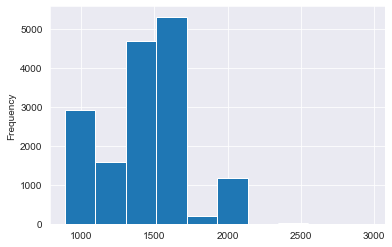

In [752]:
cars_new.Displacement.plot.hist()

In [753]:
cars.head()

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00
3,Audi A1,Sedans,14500,VAT deductible,73000,2016-08-01,66.00,1,0,2016,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1422.00,3.00,1195.00,front,diesel,3.80,99,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Used,Brown,3.30,40,6.00
4,Audi A1,Sedans,16790,VAT deductible,16200,2016-05-01,66.00,1,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1227.31,front,diesel,4.10,109,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Used,Black,3.60,43,5.00


# CO2 EMİSSİON

In [754]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.19)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [755]:
q1 = cars_new["CO2 Emission"].quantile(0.25)
q3 =  cars_new["CO2 Emission"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["CO2 Emission"] < lower_lim)
outlier_up =(cars_new["CO2 Emission"]> upper_lim)

In [756]:
cars_new["CO2 Emission"].describe()

count   15915.00
mean      117.95
std        20.00
min         5.00
25%       104.00
50%       117.00
75%       129.00
max       990.00
Name: CO2 Emission, dtype: float64

In [757]:
cars_new["CO2 Emission"][outlier_up].sort_values(ascending=False)

4556    990.00
535     331.00
10513   253.00
10772   239.00
10771   239.00
12054   199.00
12529   199.00
12554   197.00
12422   197.00
10789   197.00
12533   197.00
12553   197.00
12530   197.00
10515   194.00
15846   194.00
3590    194.00
3591    194.00
15681   193.00
15643   191.00
15644   191.00
10548   190.00
3609    189.00
10571   189.00
3587    189.00
10744   189.00
3592    189.00
3589    189.00
3593    189.00
3611    189.00
3610    189.00
10507   189.00
3608    189.00
3605    189.00
3601    189.00
3598    189.00
3596    189.00
3602    189.00
3603    189.00
3595    189.00
3604    189.00
3649    189.00
3606    189.00
3607    189.00
3600    188.00
12578   188.00
13028   188.00
15300   188.00
3648    188.00
12426   188.00
3599    188.00
13054   187.00
12521   187.00
12526   187.00
12509   187.00
12519   187.00
12518   187.00
12523   187.00
12520   187.00
12561   187.00
13031   187.00
13029   187.00
12568   187.00
13027   187.00
12961   187.00
12960   187.00
12959   187.00
12945   18

In [758]:
cars_new["CO2 Emission"][outlier_low]

1636     5.00
3612    36.00
3613    36.00
3615    36.00
3616    36.00
3617    36.00
3619    36.00
3620    36.00
3621    36.00
4089    60.00
4090    60.00
5818    12.00
6578    12.00
6579    12.00
8110    14.00
8111    14.00
8542    12.00
9798    51.00
11888   14.00
12343   13.00
12547   45.00
Name: CO2 Emission, dtype: float64

In [759]:
outlier("CO2 Emission")

In [760]:
cars_new["CO2 Emission"].describe()

count   15915.00
mean      117.24
std        17.52
min         5.00
25%       104.00
50%       114.00
75%       128.00
max       253.00
Name: CO2 Emission, dtype: float64

# Gear

In [761]:
cars.head(3)

,make_model,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear
0,Audi A1,Sedans,15770,VAT deductible,56013,2016-01-01,66.00,2,0,2016,Metallic,Cloth,Sedans,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,diesel,3.80,99,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.90,47,5.00
1,Audi A1,Sedans,14500,Price negotiable,80000,2017-03-01,141.00,1,3,2017,Metallic,Cloth,Sedans,3.00,4.00,Automatic,1798.00,4.00,1255.00,front,benzin,5.60,129,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Used,Red,2.80,33,7.00
2,Audi A1,Sedans,14640,VAT deductible,83450,2016-02-01,85.00,1,0,2016,Metallic,Cloth,Sedans,4.00,4.00,Automatic,1598.00,3.00,1330.56,front,diesel,3.80,99,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Black,3.80,46,5.00


In [762]:
cars_new["Gear"].unique()

array([5., 7., 6., 8.])

In [763]:
cars_new["Gear"].isnull().sum()

0

In [764]:
cars_new[cars_new["Gear"]==8.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Types,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
215,Audi A1,1.0 TFSI (8X) Sportback ultra,Compact,16880.00,VAT deductible,6680.00,2017-12-01,70.00,1.00,12.00,2017.00,Metallic,Cloth,Compact,5.00,4.00,Automatic,999.00,3.00,1186.09,front,benzin,4.40,104.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Used,Blue,2.00,24.00,8.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
1033,Audi A1,1.0 SBACK TFSI DESIGN 82 CV NEOPATENTATI,Sedans,20500.00,VAT deductible,3000.00,2018-12-01,60.00,1.00,24.00,2018.00,Metallic,Cloth,Sedans,5.00,5.00,Automatic,999.00,4.00,1530.00,front,benzin,4.90,102.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Voice Control...","ABS,Adaptive Cruise Control,Alarm system,Centr...",Employee's car,Grey,1.00,12.00,8.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1

In [765]:
cars_new.groupby("make_model")["Gear"].value_counts()

make_model      Gear
5.0             5.00       1
Audi A1         5.00    1770
                7.00     655
                6.00     186
                8.00       2
Audi A2         5.00       1
Audi A3         6.00    1984
                7.00    1111
                5.00       2
Opel Astra      6.00    2139
                5.00     385
                7.00       1
Opel Corsa      5.00    1755
                6.00     460
                8.00       1
Opel Insignia   6.00    2368
                8.00     221
                5.00       7
                7.00       2
Renault Clio    5.00    1444
                6.00     392
                7.00       3
Renault Duster  6.00      34
Renault Espace  6.00     844
                7.00     145
                5.00       2
Name: Gear, dtype: int64

In [ ]:
cars_new.head(3)

In [772]:
cars_new.drop(["Safety & Security","Extra","Types","Entertainment & Media","Comfort & Convenience","Paint Type","Upholstery","Body","Fuel","Gearing Type"
,"Body","registration","First Registration","Paint Type","short_description","Warranty"],inplace=True,axis=1)

In [773]:
cars_new.head()

,make_model,body_type,price,vat,km,hp,Previous Owners,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,Consumption,CO2 Emission,body_color,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
0,Audi A1,Sedans,15770.00,VAT deductible,56013.00,66.00,2.00,5.00,5.00,1422.00,3.00,1220.00,front,3.80,99.00,Black,3.90,47.00,5.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,Audi A1,Sedans,14500.00,Price negotiable,80000.00,141.00,1.00,3.00,4.00,1798.00,4.00,1255.00,front,5.60,129.00,Red,2.80,33.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,Audi A1,Sedans,14640.00,VAT deductible,83450.00,85.00,1.00,4.00,4.00,1598.00,3.00,1330.56,front,3.80,99.00,Black,3.80,46.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0

In [776]:
casr_new = pd.get_dummies(cars_new)

In [777]:
cars.to_csv("cars_final.csv")

In [778]:
casr_new

,price,km,hp,Previous Owners,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Consumption,CO2 Emission,age_as_year,age_as_month,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,...,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used,make_model_5.0,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_5.0,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_5.0,vat_Price negotiable,vat_VAT deductible,Drive chain_5.0,Drive chain_4WD,Drive chain_front,Drive chain_rear,body_color_5.0,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow
0,15770.00,56013.00,66.00,2.00,5.00,5.00,1422.00,3.00,1220.00,3.80,99.00,3.90,47.00,5.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,14500.00,80000.00,141.00,1.00,3.00,4.00,1798.00,4.00,1255.00,5.60,129.00,2.80,33.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,14640.00,83450.00,85.00,1.00,4.00,4.00,1598.00,3.00,1330.56,3.80,99.00,3.80,46.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.